# 02 - Separacion de datos y Regresion Logistica

In [1]:
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

import prediccion

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean
from IPython.display import Image



df = pd.DataFrame(pd.read_csv('mobile_price.csv'))
algoPrediccion = prediccion.ClasificacionModelo(df)
algoPrediccion.df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Contamos con una clase que se encarga de realizar todas las operaciones que involucran al aprendizaje automatico al igual que el tp de la entrega anterior

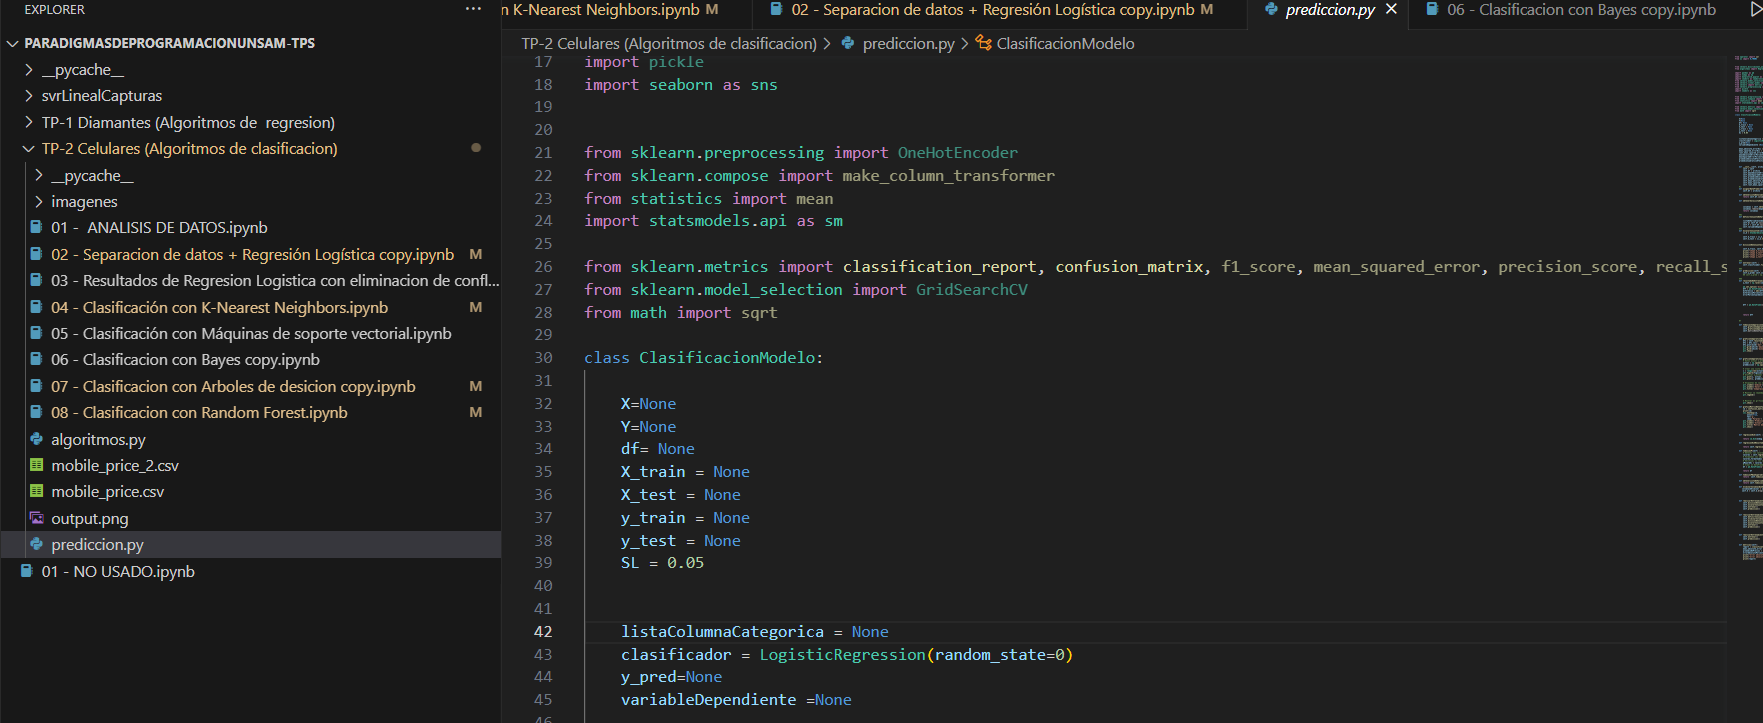

In [2]:
Image('./imagenes/1.png')

Como podemos observar arriba el atributo clasificador es por defecto LogisticRegression . Si quisieramos cambiar de modelo simplemente tendriamos que cambiar el valor de esa variable por otro algoritmo. Por suerte todos los algoritmos de clasificacion responden muy a los metodos fit y predict sin mayores inconvenientes a diferencias de los algoritmos de regresion vistos en la entrega anterior

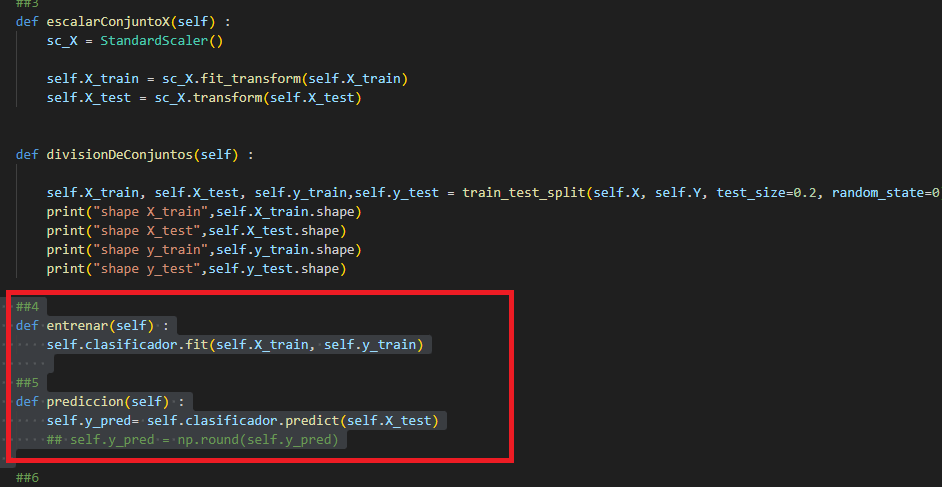

In [3]:
Image('./imagenes/4.png')

Esto es mucho mas sencillo de hacer en comparacion con los algoritmos de Regresion como por ejemplo los de abajo que corresponden a strategys del tp nro 1 mas concretamente a la RegresionPolinomica (Desde lejos la mas dificil de implementar en mi opinion) y  a la de  Maquinas con soportes vectoriales

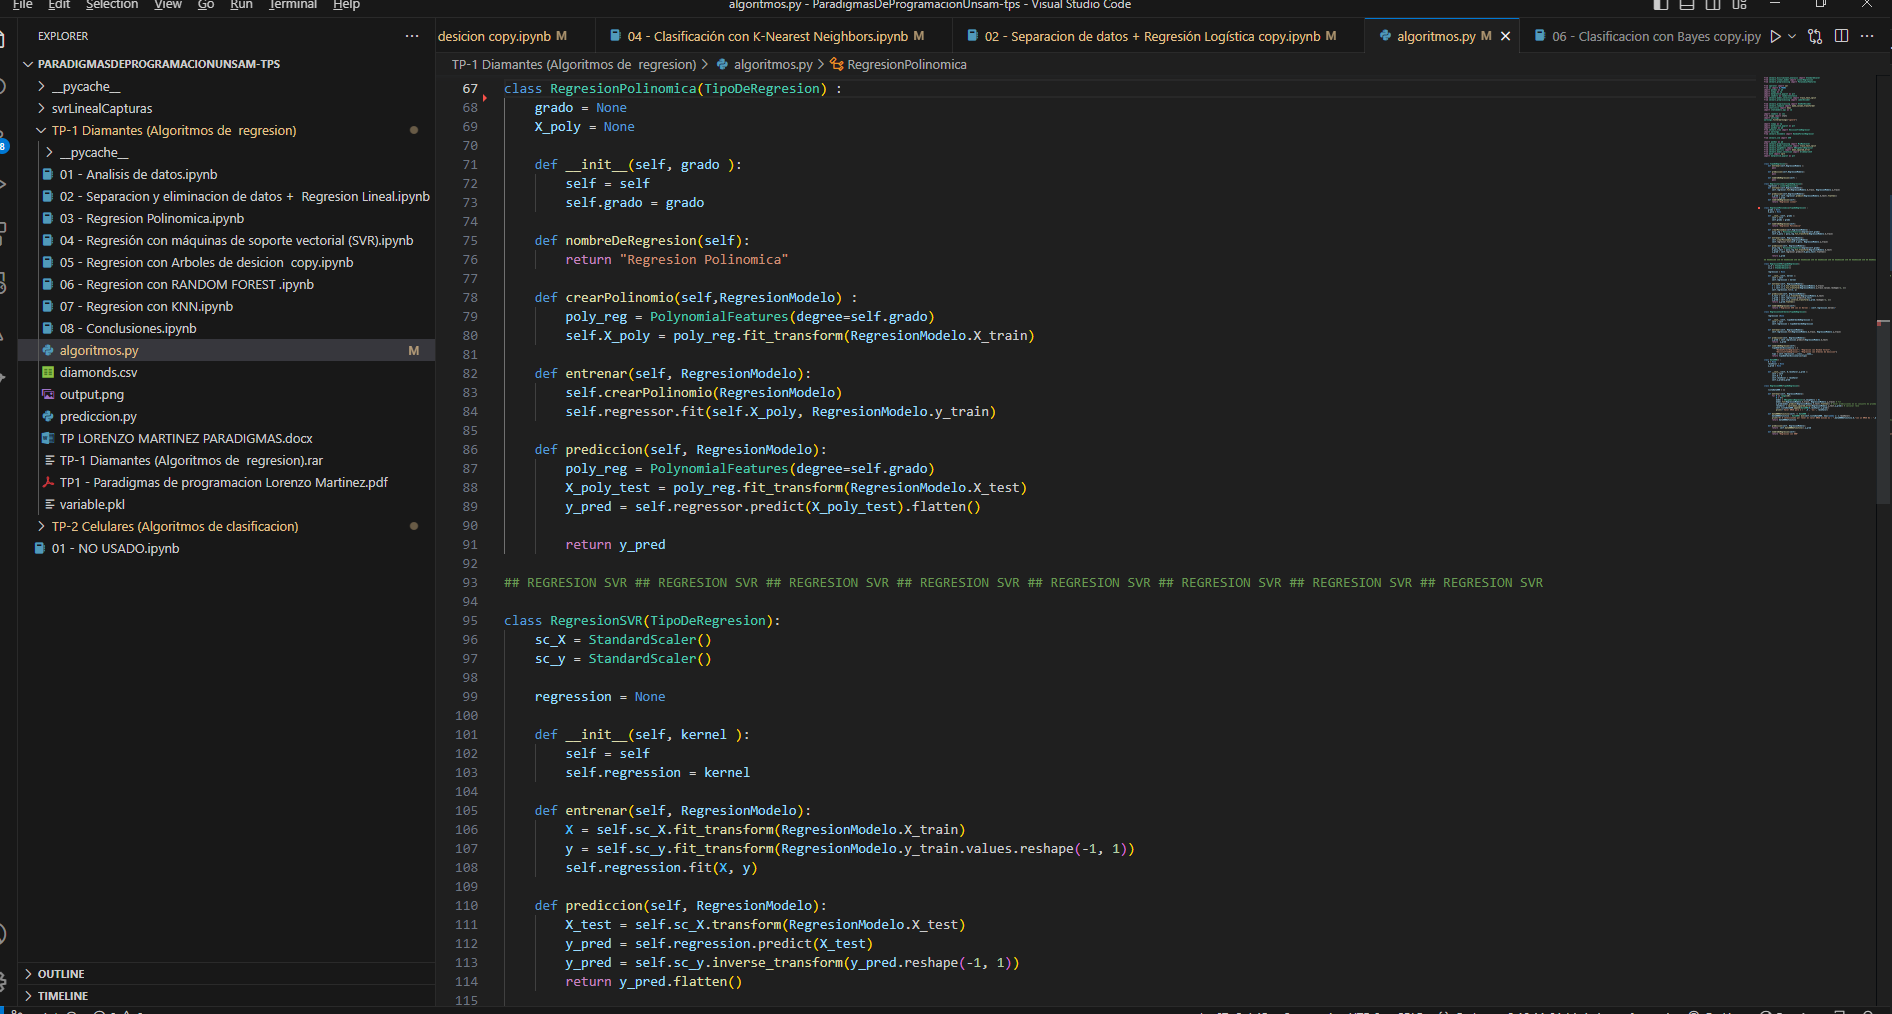

In [4]:
Image('./imagenes/3.png')

Pero volviendo a lo que verdaderamente nos interesa

# ¿Que buscamos predecir? <br>
Como ya se adelanto ,lo que buscamos predecir es el price_range con diferentes algoritmos de clasificacion. Al final del tp lo que se busca es realizar una comparacion final para determinar cual fue el mejor algoritmo para este dataset

In [5]:
algoPrediccion.definirConjuntoDeVariablesIndependientesYDependientes('price_range')
print("todas las variable independientes que van aportar para la prediccion son")
print(algoPrediccion.X.columns)
algoPrediccion.X

todas las variable independientes que van aportar para la prediccion son
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


y por supuesto la variable dependiente

In [6]:
algoPrediccion.Y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


Aca abajo esta el codigo del metodo definirConjuntoDeVariablesIndependientesYDependientes

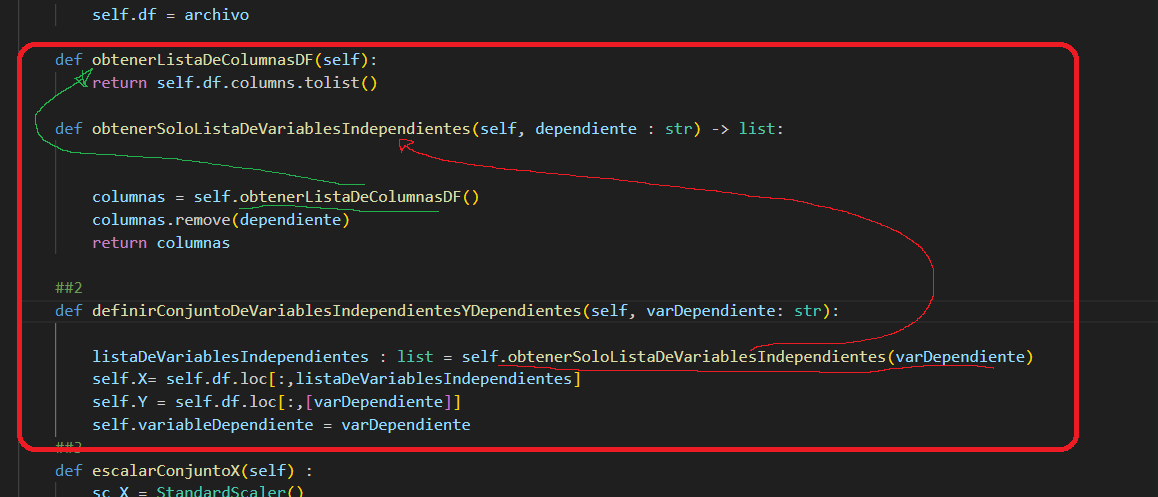

In [7]:
Image('./imagenes/2.png')

A continuación, dividimos el 80% de los datos para el conjunto de entrenamiento y el 20% de los datos 
al conjunto de pruebas usando el código de abajo. Y por ultimo mostramos su dimension


In [8]:
algoPrediccion.divisionDeConjuntos()


shape X_train (1600, 20)
shape X_test (400, 20)
shape y_train (1600, 1)
shape y_test (400, 1)


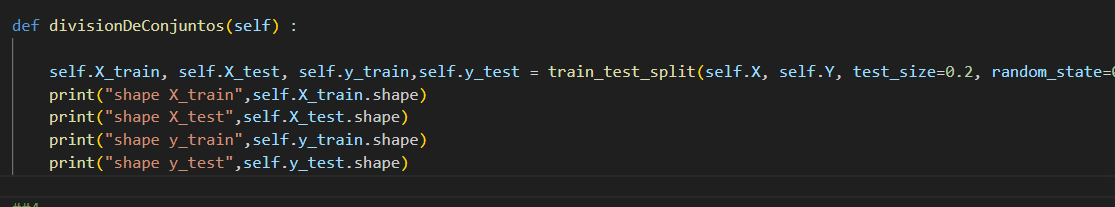

In [9]:
Image('./imagenes/5.png')

Tambien de pasada al ejecutar el metodo divisionDeConjuntos obtenemos una impresion de todas las dimensiones de los conjuntos de entrenamiento como los de testeos. Luego de la division toca escalar todos los datos. Por suerte son todos numericos por lo que ya tenemos todo servido para realizar el escalado sin ningun problema (No queremos que ninguna variable domine sobre otra por cuestiones de escalas ya que cuando las variables tienen rangos muy diferentes, es posible que una variable con una escala más grande tenga un impacto mas  en el resultado del modelo en comparación con las variables con escalas más pequeña)

In [10]:
algoPrediccion.escalarConjuntoX()

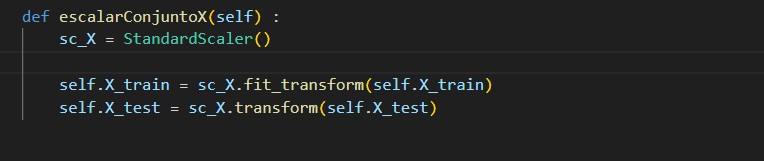

In [11]:
Image('./imagenes/6.png')

In [12]:
algoPrediccion.X_test

array([[ 0.50069734,  1.03563452, -1.27055019, ...,  0.56483953,
         1.01384584, -1.02532046],
       [-0.31837695,  1.03563452, -1.27055019, ..., -1.77041434,
         1.01384584, -1.02532046],
       [ 0.65908187,  1.03563452,  0.3228083 , ...,  0.56483953,
        -0.98634324,  0.97530483],
       ...,
       [-1.44516975,  1.03563452,  1.3033366 , ..., -1.77041434,
         1.01384584,  0.97530483],
       [ 0.99621466,  1.03563452,  0.07767623, ..., -1.77041434,
        -0.98634324, -1.02532046],
       [ 0.12962501, -0.96559161, -1.27055019, ..., -1.77041434,
         1.01384584,  0.97530483]])

In [13]:
algoPrediccion.X_train

array([[-1.60788581e-03, -9.65591606e-01,  1.67103471e+00, ...,
         5.64839529e-01, -9.86343245e-01, -1.02532046e+00],
       [ 1.37407489e+00, -9.65591606e-01, -1.27055019e+00, ...,
        -1.77041434e+00, -9.86343245e-01, -1.02532046e+00],
       [ 1.03920474e+00, -9.65591606e-01,  6.90506414e-01, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       ...,
       [-9.66386040e-02, -9.65591606e-01,  5.67940376e-01, ...,
        -1.77041434e+00, -9.86343245e-01,  9.75304830e-01],
       [-9.43759679e-02, -9.65591606e-01,  1.05820453e+00, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       [-1.19175450e+00, -9.65591606e-01, -1.27055019e+00, ...,
         5.64839529e-01, -9.86343245e-01,  9.75304830e-01]])

A continuacion realizamos el entrenamiento 

In [14]:
algoPrediccion.entrenar()


In [15]:
algoPrediccion.prediccion()

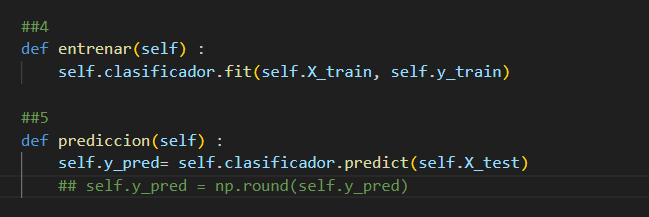

In [16]:
Image('./imagenes/7.png')

# Resultados

In [17]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,2,0,0.00
4,2,3,1,50.00
...,...,...,...,...
395,1,1,0,0.00
396,1,1,0,0.00
397,0,0,0,0.00
398,2,2,0,0.00


Como se puede ver este metodo tiene como objetivo mostrar los resultados de la prediccion en formato 
de tablas. Y hace uso del atributo y_pred cuyo valores fueron obtenido en el metodo  prediccion() mostrado anteriormente. Sobre las tablas de arriba podemos ver y comparar los Valores Reales (actual) y los predichos (prediccion). Por supuesto podemos ver tambien el error Absoluto , cuando este ultimo es 0 quiere decir que para esa fila en particular ( un celular ) la prediccion fue perfecta y porcentualmente el error porcentual absoluto es 0. Sin embargo no siempre va a ser 0 .El algoritmo puede fallar y en algunos casos se presenta porcentajes de error en un 50% o incluso un 100% .

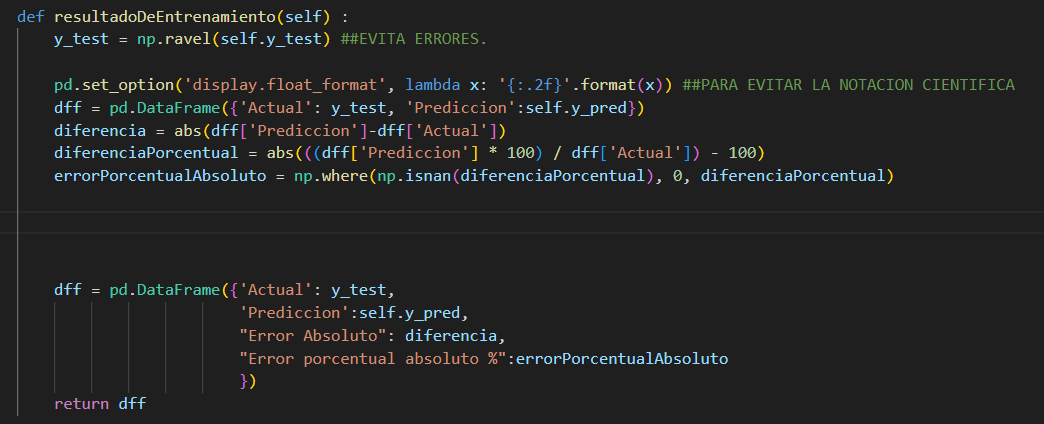

In [18]:
Image('./imagenes/8.png')

El grafico de abajo permite ver de forma mas visual los aciertos o desaciertos de la prediccion. La idea es que los mejores casos son aquellos en donde la barra Actual y prediccion tienen la misma altura. Por supuesto incluir todos los casos en una imagen no es posible porque se haria incomprensible y ademas podria no caber en toda la pantalla al menos que se use scrolls pero eso no es posible en un pdf

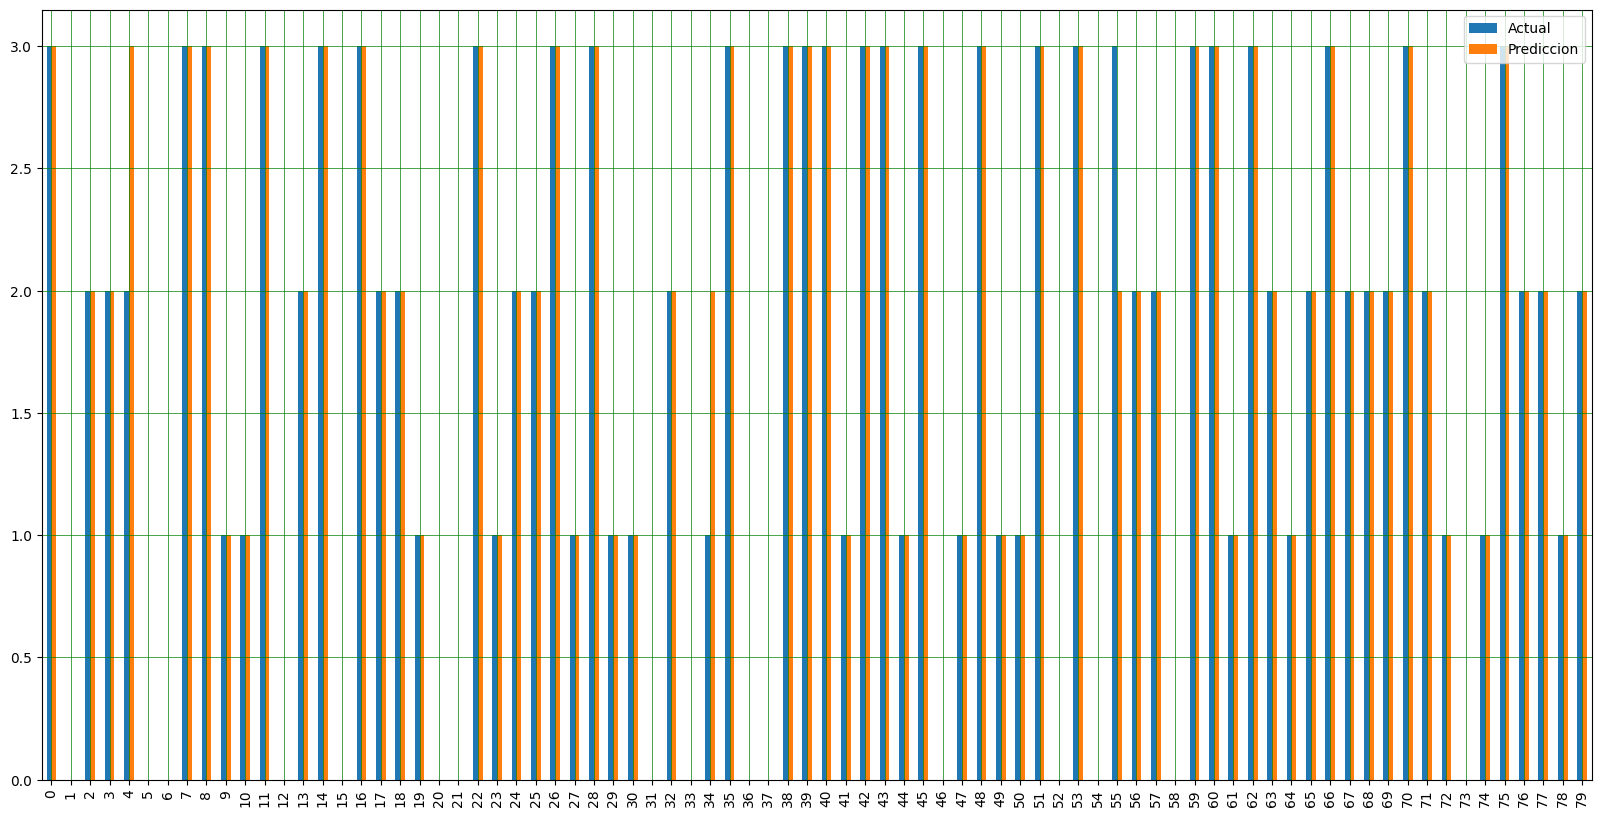

In [19]:
algoPrediccion.graficoComparativoBarras()

aca abajo el codigo del metodo que genera este grafico

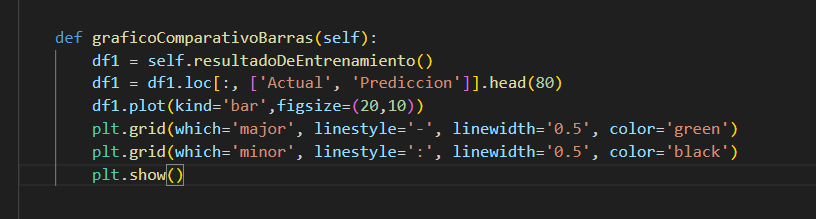

In [20]:
Image('./imagenes/9.png')

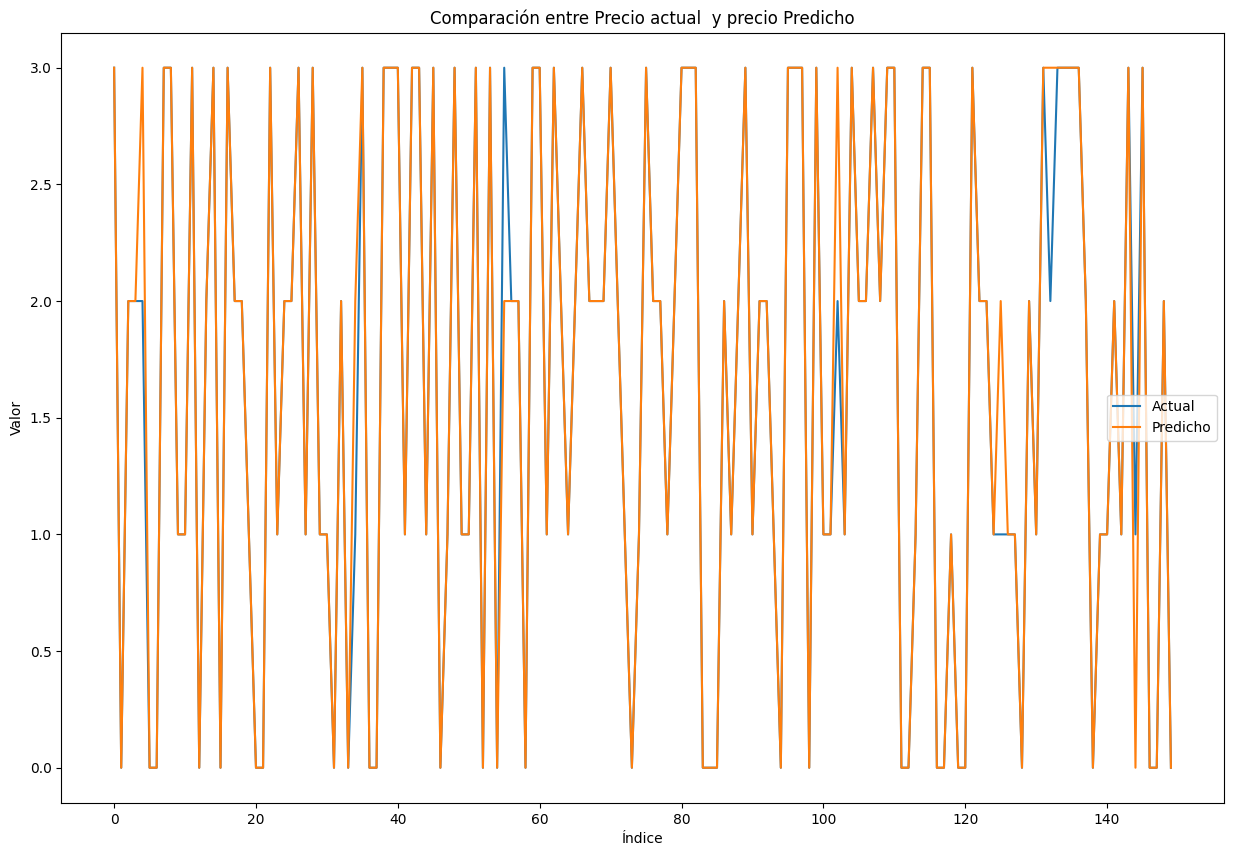

In [21]:
algoPrediccion.graficoComparativoLineas()

El conjunto de datos utilizado abarca mas de 140 casos, lo cual proporciona una muestra más amplia para 
comprender mejor los resultados. La idea principal es evaluar la coincidencia entre dos líneas en un 
punto específico (x, y). Se considera que cuanto mejor sea la superposición entre ambas líneas, mejor 
será la coincidencia lo que en otras palabras cuando la linea predicho  esta sobre la actual hasta tal punto que la oculta totalmente indica que la prediccion para un determinado celular  en un punto es perfecta

# Matriz De Confusion

[[ 93   2   0   0]
 [  2  85   5   0]
 [  0   3  91   5]
 [  0   0   1 113]]


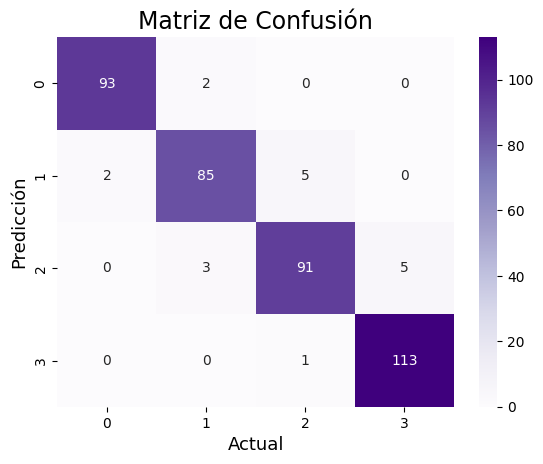

In [22]:
algoPrediccion.graficoMatrizDeConfusion()

Usamos la matriz de  confusión con el objetivo de  evaluar la calidad de la clasificación realizada por un algoritmo. En este caso particular, nos referimos  a la clasificación de un rango de precios para un celular segun sus caracteristicas 

La matriz de confusión muestra diez y seis  valores principales correspondiente a los 4 rangos de precios considerados. Como podemos observar en la diagonal se encuentran los valores acertados mientras que en el resto de las "celdas" estan los valores incorrectos osea los que el algoritmo no pudo predecir correctamente. En lineas generales se puede decir que la prediccion fue realmente buena dando un resultado de un en efectividad de un 95.5% (382 aciertos vs 18 errores). Aqui abajo el codigo



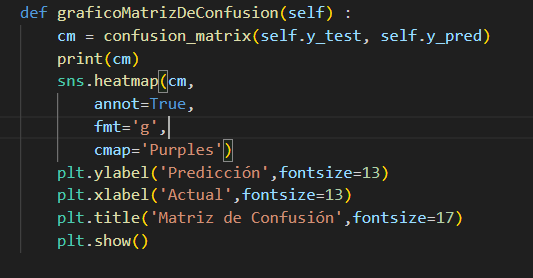

In [23]:
Image('./imagenes/10.png')

Analicemos con mayor profundidad las metricas

In [24]:
algoPrediccion.metricas()

              precision    recall  f1-score   support

           0     0.9789    0.9789    0.9789        95
           1     0.9444    0.9239    0.9341        92
           2     0.9381    0.9192    0.9286        99
           3     0.9576    0.9912    0.9741       114

    accuracy                         0.9550       400
   macro avg     0.9548    0.9533    0.9539       400
weighted avg     0.9548    0.9550    0.9548       400




A partir de los valores de precisión, recall, f1-score y support que se muestran en la tabla de arriba , podemos  concluir lo siguiente

Precision: La precisión es alta para todos los rangos de precios (0, 1, 2 y 3), con valores que van desde 0.9381 hasta 0.9789. Esto significa que el modelo tiene una baja cantidad de errores al predecir una clase osea cuando el modelo hace una predicción, suele acertar en la mayoría de los casos.

El recall, o capacidad de detectar correctamente los casos positivos, también es alto para todos los rangos de precios, con valores que van desde 0.9192 hasta 0.9912. Esto indica que el modelo tiene una baja cantidad de errores al pasar por alto casos positivos. En otras palabras, el algoritmo predice  correctamente la mayoría de los rangos de precios

El f1-score, que es una combinación de la precisión y el recall, también es alto para todos los rangos de precios. Esto significa que el modelo logra un buen equilibrio en acertar las predicciones y en no dejar pasar casos importantes. En general, esto indica que el modelo tiene una buena capacidad para clasificar correctamente los rangos de precios de los celulares según sus características.


Support: El Support representa la cantidad de muestras en cada rango de precios. En este caso, tenemos diferentes cantidades de muestras para cada rango de precios, que van desde 92 hasta 114

Accuracy: La precisión general del modelo, que representa la exactitud de las predicciones en todas  los rango de precios, es del 95.50%. Esto significa que  el algoritmo logra predecir correctamente el rango de precios de los celulares en la mayoría de los casos, con una alta tasa de aciertos.

En general, los resultados demuestran que realmente  el algoritmo de regresion logistica  tiene un buen rendimiento con la predicciones de los rangos de precios para los celulares según sus características

Si bien tuvimos un 95.50% de accuracy podriamos hacerno una pregunta : ¿ podriamos obtener mejores resultado que ese 95.5%
si aplicamos algun algoritmo de eliminación en aquellas variables o columnas menos significativas que 
no aporten mucho a los resultados de la predicciones? Veámoslo.


# Eliminacion hacia atras

In [25]:
algoPrediccion.regresionOLSResultados()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            price_range   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              2463.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        23:05:39   Log-Likelihood:                         -837.39
No. Observations:                2000   AIC:                                      1715.
Df Residuals:                    1980   BIC:                                      1827.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
battery_power     0.0004   1.79e-05     20.864      0.000       0.000       0.000
blue             -0.0395      0.017     -2.390      0.017      -0.072      -0.007
clock_speed      -0.0649      0.010     -6.572      0.000      -0.084      -0.046
dual_sim         -0.0795      0.016     -4.838      0.000      -0.112      -0.047
fc                0.0007      0.002      0.261      0.794      -0.004       0.006
four_g           -0.0034      0.020     -0.164      0.870      -0.043       0.037
int_memory       -0.0013      0.000     -3.013      0.003      -0.002      -0.000
m_dep            -0.1295      0.028     -4.585      0.000      -0.185      -0.074
mobile_wt        -0.0034      0.000    -16.284      0.000      -0.004      -0.003
n_cores          -0.0180      0.004     -5.127      0.000      -0.025      -0.011
pc               -0.0047      0.002     -2.673      0.008      -0.008      -0.001
px_height         0.0003   2.18e-05     12.994      0.000       0.000       0.000
px_width          0.0001   2.14e-05      6.513      0.000    9.75e-05       0.000
ram               0.0009    7.5e-06    121.780      0.000       0.001       0.001
sc_h             -0.0156      0.002     -7.258      0.000      -0.020      -0.011
sc_w              0.0017      0.002      0.753      0.451      -0.003       0.006
talk_time        -0.0072      0.001     -4.853      0.000      -0.010      -0.004
three_g          -0.0697      0.024     -2.956      0.003      -0.116      -0.023
touch_screen     -0.0545      0.016     -3.314      0.001      -0.087      -0.022
wifi             -0.0628      0.017     -3.806      0.000      -0.095      -0.030
==============================================================================
Omnibus:                       21.506   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.084
Skew:                           0.042   Prob(JB):                     0.000874
Kurtosis:                       2.597   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Aca abajo el codigo

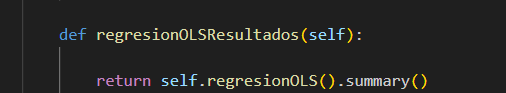

In [26]:
Image('./imagenes/11.png')

Se va a utilizar el algoritmo de eliminacion hacia atrás asi que de todo la informacion que se nos muestra arriba lo 
unico que nos interesa son los p valores. Asi que generamos otra tabla mas simplificada que nos permita visualizar lo que buscamos con mas claridad

In [27]:
algoPrediccion.todosLosP()

,P-Values,P>0.05
battery_power,0.000,False
blue,0.017,False
clock_speed,0.000,False
dual_sim,0.000,False
fc,0.794,True
four_g,0.870,True
int_memory,0.003,False
m_dep,0.000,False
mobile_wt,0.000,False
n_cores,0.000,False


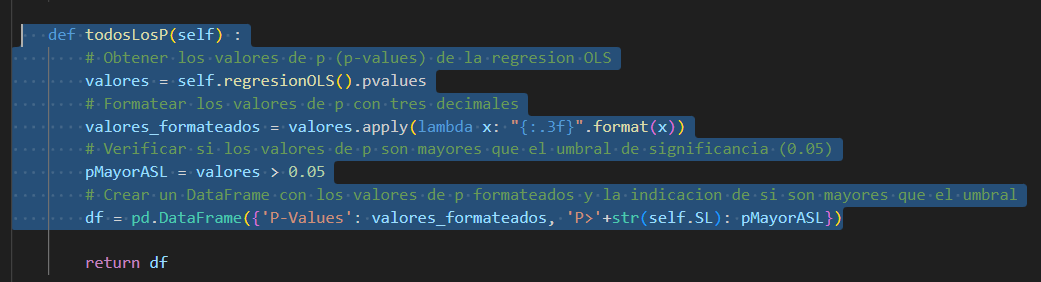

In [28]:
Image('./imagenes/12.png')

Con el codigo de arriba logramos obtener una tabla mucho mas simplificada y mas util para lo que 
queremos hacer . Ahora veamos unicamente aquell cuentan con P-values que superan al umbral 
establecido (0.05) 


In [29]:
algoPrediccion.todosLosPQueSuperaAlSL()

,P-Values,P>0.05
fc,0.794,True
four_g,0.870,True
sc_w,0.451,True


Como observamos aca contamos con 3 columnas o variables independientes  que cuentan con P-values que superan al umbral 
establecido (0.05)  <br> <br>
El método por supuesto  sería más útil si hubiera más casos en donde se supera el umbral ,aun asi, incluso con un número limitado de casos, esta tabla visual es útil para identificar rápidamente las variables independientes menos significativas para nuestro  modelo que efectivamente  serán eliminadas. 

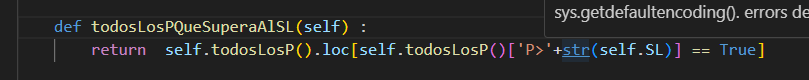

In [30]:
Image('./imagenes/13.png')

Acontinuacion visualizamos en una lista las variables que van a a ser eliminadas de nuestro conjunto de variables independientes

In [31]:
algoPrediccion.obtenerListaDeVariablesIndQueSuperanAlLS()

['fc', 'four_g', 'sc_w']

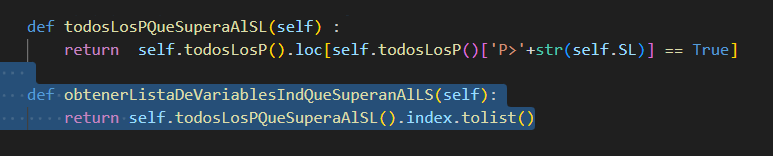

In [32]:
Image('./imagenes/15.png')

Finalmente procedemos a la eliminacion y vemos los resultados


In [33]:
algoPrediccion.eliminarColumnasQueSuperenAlSL()

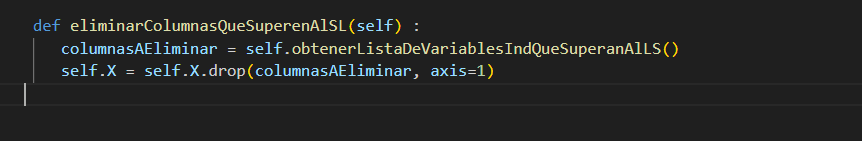

In [34]:
Image('./imagenes/16.png')

In [35]:
algoPrediccion.todosLosPQueSuperaAlSL()

,P-Values,P>0.05


In [36]:
algoPrediccion.obtenerListaDeVariablesIndQueSuperanAlLS()

[]

Como podemos ver arriba ,ya no contamos con esas columnas que que superaban el umbral. Originalmente nuestro conjunto X de variables independiente contaba con 20 elementos, actualmente al eliminar 3 de esos nos quedan 17. Comprobemos

In [37]:
algoPrediccion.X.shape[1]

17

A continuacion volvemos a realizar el entrenamiento DESDE 0. Esta vez estamos seguro de que todas 
las variables que tenemos son significativas para nuestro modelo.

In [38]:

algoPrediccion.realizarEntrenamientoCompletoSinEliminacionHaciaAtras()

shape X_train (1600, 17)
shape X_test (400, 17)
shape y_train (1600, 1)
shape y_test (400, 1)


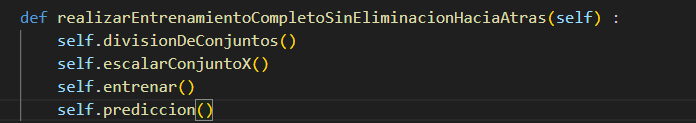

In [39]:
Image('./imagenes/17.png')

Con el metodo de arriba realizamos el entrenamiento completo pero sin realizar la eliminacion hacia atras pues ya la hicimos y hacerlo devuelta es lo mismo que nada

In [40]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,2,0,0.00
4,2,3,1,50.00
...,...,...,...,...
395,1,1,0,0.00
396,1,1,0,0.00
397,0,0,0,0.00
398,2,2,0,0.00


A simple vista no vemos cambios. Continuemos

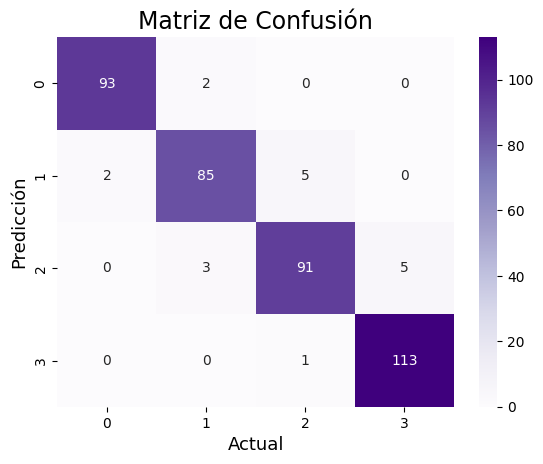

In [41]:
# primero veamos  la matriz  de abajo  que  habiamos generado anteriormente
Image('./imagenes/19.png')

ahora veamos la que generamos despues de la realizar la eliminacion hacia atras

[[ 93   2   0   0]
 [  2  86   4   0]
 [  0   5  89   5]
 [  0   0   2 112]]


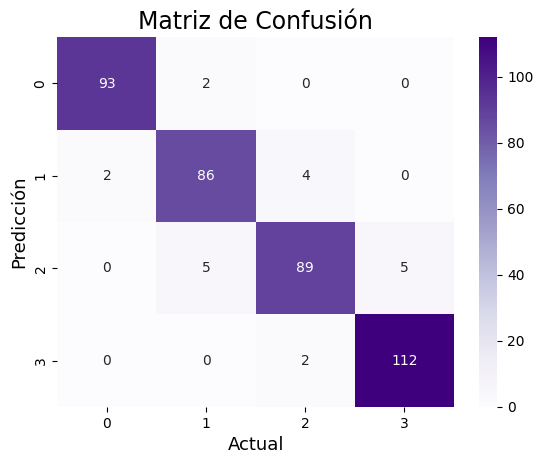

In [42]:
algoPrediccion.graficoMatrizDeConfusion()

Los numeros de aciertos en total disiminuyeron 2 unidades. Como podemos ver arriba. Analicemos las metricas

In [43]:
algoPrediccion.metricas()

              precision    recall  f1-score   support

           0     0.9789    0.9789    0.9789        95
           1     0.9247    0.9348    0.9297        92
           2     0.9368    0.8990    0.9175        99
           3     0.9573    0.9825    0.9697       114

    accuracy                         0.9500       400
   macro avg     0.9494    0.9488    0.9490       400
weighted avg     0.9499    0.9500    0.9498       400



Como podemos ver si comparamos la tabla de arriba con la de abajo, perdimos 0.050% en accuracy  lo cual no es bueno ,aun asi es un numero realmente pequeño . 
el objetivo de la eliminación hacia atrás era reducir el modelo de clasificacion y quedarnos solo con las 
variables más importantes y relevantes  para nuestra prediccion , en simples palabras reducir la complejidad. Inicialmente se 
contaban 20 columnas que representan las variables independientes (X), pero después de aplicar la 
eliminación hacia atrás,se eliminaron 3 columnas y quedandonos asi con 17.
Como pudimos observar al  haber eliminado esas tres columnas, la precisión general  (acucuracy) disiminuyo en 
en el modelo pero en un porcentaje muy pequeño. Esto nos indica que las tres columnas que se eliminaron  no eran tan importantes para hacer predicciones precisas pero que aun asi tienen un impacto  negativo relativamente pequeño, empeorando asi nuestras predicciones pero no de forma grave.. 

Podemos concluir que las variables en esas tres columnas no estaban aportando información o por lo menos lo suficientemente
significativa para predecir la variable dependiente.
Esto significa que se puede simplificar el modelo al eliminar esas tres columnas, pero comprometiendo minimamente la 
calidad de las predicciones. Aun asi la eliminacion hacia atras se va aplicar para todos los algoritmos de clasificacion. Si bien en este caso la eliminacion empeoro los resultados, en otros algoritmos la cosa podria cambiar.

<hr><hr>